# Boston housing pricing dataset

## Importing dataset

In [23]:
from keras.datasets import boston_housing
import numpy as np

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

### Get a feel of the data

In [8]:
print('Training shape, number of examples -- ', train_data.shape,',', len(train_data))
print('Test shape, number of examples -- ', test_data.shape,',', len(test_data))
print('Example train data -- ', train_data[0])
print('Training label eg. -- ', train_labels[0])

Training shape, number of examples --  (404, 13) , 404
Test shape, number of examples --  (102, 13) , 102
Example train data --  [  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
Training label eg. --  15.2


### Normalizing the data

In [9]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## Building the network

In [10]:
from keras.models import Sequential
from keras.layers import Dense

def build_model(): # DRY objective
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(634, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

### Using K-fold validation

<img src='https://i.stack.imgur.com/k76HN.png' height='40%' width='50%' alt='K-fold validation description'>

In [37]:
k = 4
num_epochs = 10
all_mae_histories = []
num_samples = len(train_data) // k

for i in range(k):
    print('Processing fold #', i)
    val_data = train_data[i*num_samples: (i+1)*num_samples] # Slice out the subsection
    val_labels = train_labels[i*num_samples: (i+1)*num_samples]
    partial_x_train = np.concatenate([train_data[:i*num_samples], train_data[(i+1)*num_samples:]], axis=0)
    partial_y_train = np.concatenate([train_labels[:i*num_samples], train_labels[(i+1)*num_samples:]], axis=0)
    
    model = build_model()
    print('Specifications -- ', i*num_samples, (i+1)*num_samples)
    print('Specificatinos -- ', partial_x_train.shape, partial_y_train.shape)
    print('Specifications -- #2', val_data.shape, val_labels.shape)


    history = model.fit(partial_x_train, partial_y_train, validation_data=(val_data, val_labels), epochs=num_epochs, batch_size=1, verbose=1)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

Processing fold # 0
Specifications --  0 101
Specificatinos --  (303, 13) (303,)
Specifications -- #2 (101, 13) (101,)
Train on 303 samples, validate on 101 samples
Epoch 1/10
303/303 [==============================] - 1s 3ms/step - loss: 200.8055 - mean_absolute_error: 10.4536 - val_loss: 122.4991 - val_mean_absolute_error: 7.8938
Epoch 2/10
303/303 [==============================] - 0s 1ms/step - loss: 99.4145 - mean_absolute_error: 7.5584 - val_loss: 57.5995 - val_mean_absolute_error: 6.2220
Epoch 3/10
303/303 [==============================] - 0s 2ms/step - loss: 71.9582 - mean_absolute_error: 6.0305 - val_loss: 43.1951 - val_mean_absolute_error: 4.5437
Epoch 4/10
303/303 [==============================] - 0s 1ms/step - loss: 62.1881 - mean_absolute_error: 5.7411 - val_loss: 46.4478 - val_mean_absolute_error: 5.4415
Epoch 5/10
303/303 [==============================] - 0s 1ms/step - loss: 64.6251 - mean_absolute_error: 5.8561 - val_loss: 64.2330 - val_mean_absolute_error: 6.1223
Ep

### Building history of succesive mean K-fold validation scores

In [39]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

## Plotting validation scores

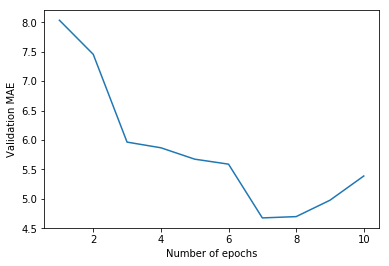

In [49]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Number of epochs')
plt.ylabel('Validation MAE')
plt.show()